# Examine the datasets

In [1]:
# Cell to hide - just an option

import pandas as pd
pd.set_option('display.max_columns', 27)

## Import the data <a class="anchor" id="import-data"></a>

Now that you understand the meaning of each attribute, you can take a deeper look into the dataset itself, to learn from the distribution of the attributes and their possible relationships and interdependencies. This step will allow you to have a good overview on your data to better solve the diverse tasks for your customers later.

First, you need to load the data again.

In [1]:
import pandas as pd

dynamic_data = pd.read_csv('./dynamic_data.csv')
static_data = pd.read_csv('./static_data.csv')

## Dynamic data - let's do it together <a class="anchor" id="dyn-data"></a>

First, we can use various methods to get an overview of the dataset: the method [info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) returns the count of instances and attributes in the dataset, the method [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) prints the distribution of each numerical attribute. Let's have a look at those together:

In [2]:
dynamic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
MMSI            100000 non-null int64
BaseDateTime    100000 non-null object
LAT             100000 non-null float64
LON             100000 non-null float64
SOG             100000 non-null float64
COG             100000 non-null float64
Heading         100000 non-null float64
VesselName      95405 non-null object
IMO             47669 non-null object
CallSign        80589 non-null object
VesselType      88926 non-null float64
Status          70249 non-null object
Length          85415 non-null float64
Width           71123 non-null float64
Draft           42189 non-null float64
TripID          100000 non-null int64
DepTime         100000 non-null object
ArrTime         100000 non-null object
DepLat          100000 non-null float64
DepLon          100000 non-null float64
ArrLat          100000 non-null float64
ArrLon          100000 non-null float64
DepCountry      100000 non-nu

+ ``RangeIndex: 100000 entries, 0 to 99999``: this means that the dataset contains 100000 instances, or 100000 lines. This is the number of AIS messages that are represented in the dataset.
+ ``Data columns (total 26 columns)``: this shows that the dataset contains 26 attributes (represented as columns in the dataset).
+ Then follows a list of each attribute, with the number of recorded (non-null) values for each and their [type](./../../introduction/0-2-supervised-learning.html). 
+ Finally, we see a summary of the types and the number of attributes of each type, and the memory used by this dataset.

In [3]:
dynamic_data.head(1)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,DepTime,ArrTime,DepLat,DepLon,ArrLat,ArrLon,DepCountry,DepCity,ArrCountry,ArrCity
0,367114690,2017-01-01 00:00:06,48.51094,-122.60705,0.0,-49.6,511.0,NaN,NaN,NaN,...,2017-01-01 00:00:06,2017-01-01 02:40:45,48.51094,-122.60705,48.51095,-122.60705,US,Anacortes,US,Anacortes


Above, we printed the first instance of the dataset. As we see, some attributes have the value ``NaN``. This means that this value is missing (it has not been recorded or saved). This is the reason why some attributes above don't have ``100000 non-null`` but rather a lower number of instances: some of these values are missing, and we call them __missing values__.

In [4]:
dynamic_data.describe()

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Length,Width,Draft,TripID,DepLat,DepLon,ArrLat,ArrLon
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,88926.000000,85415.000000,71123.000000,42189.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.590440e+08,46.221127,-122.893343,1.775973,-16.296728,369.527000,952.373142,60.899165,13.653366,6.055567,668.135890,46.222409,-122.892360,46.220749,-122.897869
std,5.927431e+07,3.850865,0.703268,4.491950,118.459501,174.132613,237.057544,74.529841,10.556948,4.340102,409.245317,3.854998,0.706539,3.846843,0.705792
min,3.160089e+06,32.209370,-125.998590,-0.100000,-204.800000,0.000000,0.000000,6.710000,0.000000,0.000000,1.000000,32.220640,-125.995610,32.209370,-125.998590
25%,3.160334e+08,46.137208,-123.190290,0.000000,-116.600000,205.000000,1004.000000,18.140000,6.430000,3.000000,317.000000,46.137290,-123.204420,46.144140,-123.192990
50%,3.669768e+08,47.645370,-122.688210,0.000000,-49.600000,511.000000,1018.000000,26.490000,9.350000,4.500000,646.000000,47.645390,-122.683800,47.645110,-122.688210
75%,3.675157e+08,48.621405,-122.385730,0.100000,77.900000,511.000000,1019.000000,60.840000,18.280000,9.100000,1001.000000,48.621300,-122.385500,48.621200,-122.385970
max,9.876543e+08,49.890740,-120.002420,42.100000,204.700000,511.000000,1025.000000,349.000000,50.000000,18.800000,1520.000000,49.890740,-120.002920,49.832120,-120.002420


This function returns some statistics about the distribution of the numerical attributes in the dataset. For example, we can see that the 3rd quartile ('75%') of the attribute SOG has a value of 0.1, which means that 75% of the recorded values for SOG are less than 0.1 Knot: we can conclude from this information that most of the recorded datapoints in this dataset concern immobile ships.

Now, with some simple histograms, we can have a visualization the distribution of each attribute in the dataset. This will allow us to look a little deeper than with the function ``describe()`` above.

For that, we use the method [plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) of a Pandas Series, which allows to produce different types of plot for an attribute, here we choose [hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html).

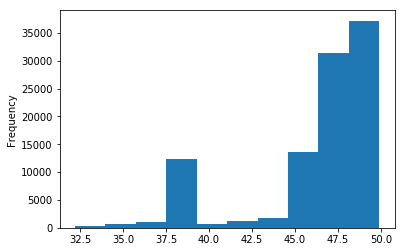

In [6]:
dynamic_data['LAT'].plot.hist()

This plot shows the distribution of the latitude attribute in the dataset. We can see that many values are comprised in the range [45.0 ; 50.0]. This means that many positions are recorded in this area, while the range [32.5 ; 45.0] is less dense in recorded positions. If you want to know more about the histograms and the different kinds of plots used in the class, you can visit [this page](./../../introduction/0-3-graphs.html).

We can create this type of plot for every numerical attribute in the dataset. In the previous cell, try to change the name of the plotted attribute to visualize the other attributes. You can even try to put the name of a non-numerical attribute to see what happens.

In [7]:
# For beginner version: cell to hide

import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

num_attributes = dynamic_data.select_dtypes([np.number]).columns

def plot_hist(att):
    dynamic_data[att].plot.hist()

interact(plot_hist, att = widgets.Dropdown(
    options = num_attributes,
    value = num_attributes[0],
    description = 'Attribute:',
    disabled = False,
))

interactive(children=(Dropdown(description='Attribute:', options=('MMSI', 'LAT', 'LON', 'SOG', 'COG', 'Heading…

<function __main__.plot_hist(att)>

Finally, we can see the different values of each attribute with the method [unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html):

In [8]:
dynamic_data['VesselType'].unique()

array([  nan, 1012., 1019., 1001., 1025., 1024., 1004., 1018., 1005.,
         70.,   30., 1020.,   99., 1003.,   80., 1013.,   31., 1002.,
         52.,   53., 1011.,   50.,   35., 1023.,   69.,   37.,    7.,
         60., 1022.,   90.,   51., 1010.,    0.,   79.,   71., 1017.])

With this result, and by comparing the values with the documention available [here](https://coast.noaa.gov/data/marinecadastre/ais/VesselTypeCodes2018.pdf), you can analyze what kind of ships are present in the dataset.

Have a look at the different values for the other attributes by changing the name of the attribute in the previous cell.

In [9]:
# For beginner version: cell to hide

import ipywidgets as widgets
from ipywidgets import interact

attributes = dynamic_data.columns

def get_unique(att):
    print(dynamic_data[att].unique())

interact(get_unique, att = widgets.Dropdown(
    options = attributes,
    value = attributes[0],
    description = 'Attribute:',
    disabled = False,
))

interactive(children=(Dropdown(description='Attribute:', options=('MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG',…

<function __main__.get_unique(att)>

Additionaly, we can create a 2 dimensional plot, to represent 2 attributes against each other, with the library [pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) and the function [plot()](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.plot.html). For example, on this picture, we represent the attributes longitude and latitude, to get a geographical representation of the recorded datapoints:

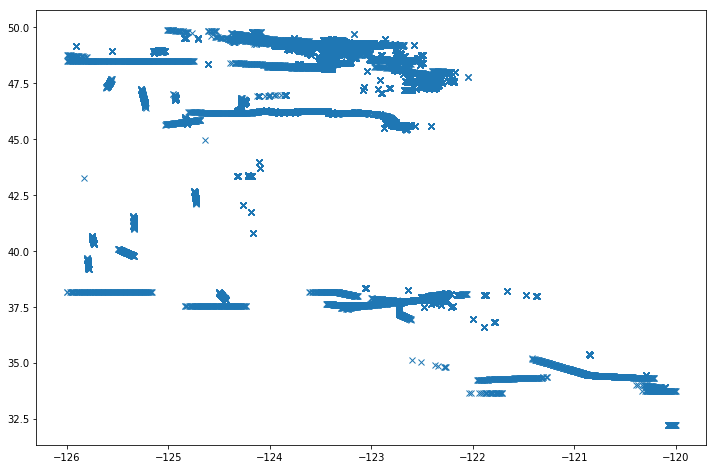

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(dynamic_data['LON'], dynamic_data['LAT'], 'x')

The datapoints are represented as crosses, and on this plot, each separated blue line is a very likely one recorded trip.

Change the name of the attributes and try to compare other (numerical) attributes.

In [2]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

num_attributes = dynamic_data.select_dtypes([np.number]).columns

def plot_2att(att1, att2):
    plt.figure(figsize = (12, 8))
    plt.plot(dynamic_data[att1], dynamic_data[att2], 'x')
    plt.xlabel(att1)
    plt.ylabel(att2)

interact(plot_2att,
         att1 = widgets.Dropdown(options = num_attributes,
                                 value = num_attributes[0],
                                 description = 'Attribute (x):',
                                 disabled = False,),
         att2 = widgets.Dropdown(options = num_attributes,
                                 value = num_attributes[0],
                                 description = 'Attribute (y):',
                                 disabled = False,))

interactive(children=(Dropdown(description='Attribute (x):', options=('MMSI', 'LAT', 'LON', 'SOG', 'COG', 'Hea…

<function __main__.plot_2att(att1, att2)>

You can also choose to visualize the information of this dataset for only one trip. For example, we want to see the longitude and latitude values for the trip with the TripID 106:

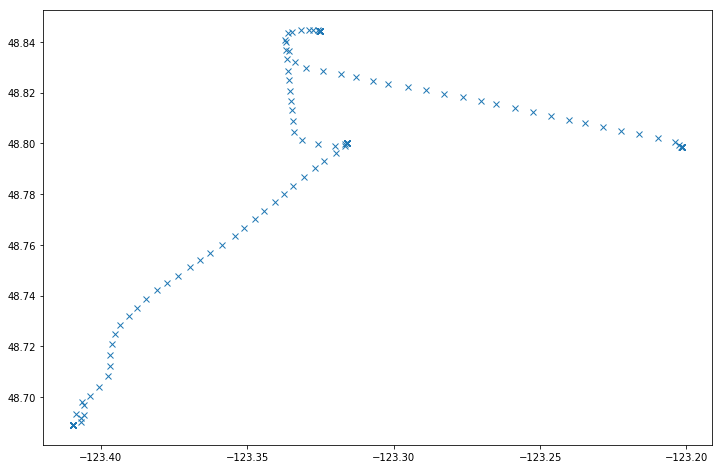

In [12]:
# for one trip

trip = dynamic_data.loc[dynamic_data['TripID'] == 106]

plt.figure(figsize = (12, 8))
plt.plot(trip['LON'], trip['LAT'], 'x')

Change the value of the TripID attribute, and the names of the attributes, to plot anything else.

In [13]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

num_attributes = dynamic_data.select_dtypes([np.number]).columns

def plot_1trip(tripid, att1, att2):
    trip = dynamic_data.loc[dynamic_data['TripID'] == tripid]
    plt.figure(figsize = (12, 8))
    plt.plot(trip[att1], trip[att2], 'x')
    plt.xlabel(att1)
    plt.ylabel(att2)

interact(plot_1trip,
         tripid = widgets.BoundedIntText(value = 1,
                                         min = 1,
                                         max = 1520,
                                         step = 1,
                                         description = 'TripID [1 ; 1520]:',
                                         disabled = False),
         att1 = widgets.Dropdown(options = num_attributes,
                                 value = num_attributes[0],
                                 description = 'Attribute (x):',
                                 disabled = False,),
         att2 = widgets.Dropdown(options = num_attributes,
                                 value = num_attributes[0],
                                 description = 'Attribute (y):',
                                 disabled = False,))

interactive(children=(BoundedIntText(value=1, description='TripID [1 ; 1520]:', max=1520, min=1), Dropdown(des…

<function __main__.plot_1trip(tripid, att1, att2)>

<iframe src="https://h5p.org/h5p/embed/742748" width="694" height="600" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>

## Static data - your turn <a class="anchor" id="sta-data"></a>

Using the same tools as for the dynamic dataset, you can now analyze the static dataset.

In [14]:
static_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 22 columns):
TripID        1520 non-null int64
MMSI          1520 non-null int64
MeanSOG       1520 non-null float64
VesselName    1442 non-null object
IMO           538 non-null object
CallSign      1137 non-null object
VesselType    1287 non-null float64
Length        1220 non-null float64
Width         911 non-null float64
Draft         496 non-null float64
Cargo         378 non-null float64
DepTime       1520 non-null object
ArrTime       1520 non-null object
DepLat        1520 non-null float64
DepLon        1520 non-null float64
ArrLat        1520 non-null float64
ArrLon        1520 non-null float64
DepCountry    1520 non-null object
DepCity       1520 non-null object
ArrCountry    1520 non-null object
ArrCity       1520 non-null object
Duration      1520 non-null object
dtypes: float64(10), int64(2), object(10)
memory usage: 261.3+ KB


In [15]:
static_data.describe()

,TripID,MMSI,MeanSOG,VesselType,Length,Width,Draft,Cargo,DepLat,DepLon,ArrLat,ArrLon
count,1520.000000,1.520000e+03,1520.000000,1287.000000,1220.000000,911.000000,496.000000,378.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,760.500000,3.597421e+08,1.034825,971.680653,56.769590,13.104501,6.457056,50.515873,46.354331,-122.868905,46.353671,-122.871346
std,438.930518,6.263661e+07,2.936439,198.957887,74.739358,10.903338,4.607529,22.693810,3.766705,0.681947,3.762056,0.680604
min,1.000000,3.160089e+06,-0.100000,0.000000,6.710000,0.000000,0.000000,0.000000,32.220640,-125.995610,32.209370,-125.998590
25%,380.750000,3.380724e+08,0.000000,1004.000000,14.840000,5.500000,3.000000,31.000000,46.168652,-123.178480,46.168460,-123.168262
50%,760.500000,3.669802e+08,0.012633,1019.000000,22.340000,8.000000,4.650000,52.000000,47.647795,-122.651365,47.646925,-122.645290
75%,1140.250000,3.675663e+08,0.072000,1019.000000,41.277500,16.350000,10.025000,70.000000,48.656940,-122.386562,48.665710,-122.386607
max,1520.000000,9.876543e+08,20.360811,1025.000000,349.000000,50.000000,18.800000,99.000000,49.890740,-120.002920,49.832120,-120.002420


In [ ]:
#static_data[''].plot.hist()

In [16]:
# For beginner version: cell to hide

import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

num_attributes = static_data.select_dtypes([np.number]).columns

def plot_hist(att):
    static_data[att].plot.hist()

interact(plot_hist, att = widgets.Dropdown(
    options = num_attributes,
    value = num_attributes[0],
    description = 'Attribute:',
    disabled = False,
))

interactive(children=(Dropdown(description='Attribute:', options=('TripID', 'MMSI', 'MeanSOG', 'VesselType', '…

<function __main__.plot_hist(att)>

In [ ]:
#static_data[''].unique()

In [17]:
# For beginner version: cell to hide

import ipywidgets as widgets
from ipywidgets import interact

attributes = static_data.columns

def get_unique(att):
    print(static_data[att].unique())

interact(get_unique, att = widgets.Dropdown(
    options = attributes,
    value = attributes[0],
    description = 'Attribute:',
    disabled = False,
))

interactive(children=(Dropdown(description='Attribute:', options=('TripID', 'MMSI', 'MeanSOG', 'VesselName', '…

<function __main__.get_unique(att)>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
#plt.plot(static_data[''], static_data[''], 'x')

In [19]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

num_attributes = static_data.select_dtypes([np.number]).columns

def plot_2att(att1, att2):
    plt.figure(figsize = (12, 8))
    plt.plot(static_data[att1], static_data[att2], 'x')
    plt.xlabel(att1)
    plt.ylabel(att2)

interact(plot_2att,
         att1 = widgets.Dropdown(options = num_attributes,
                                 value = num_attributes[0],
                                 description = 'Attribute (x):',
                                 disabled = False,),
         att2 = widgets.Dropdown(options = num_attributes,
                                 value = num_attributes[0],
                                 description = 'Attribute (y):',
                                 disabled = False,))

interactive(children=(Dropdown(description='Attribute (x):', options=('TripID', 'MMSI', 'MeanSOG', 'VesselType…

<function __main__.plot_2att(att1, att2)>

.

<iframe src="https://h5p.org/h5p/embed/742791" width="694" height="600" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>